In [59]:
import pandas as pd
from arcgis.gis import GIS
from datetime import date, timedelta
import numpy as np

# Get yesterday and 7 days ago for date range
today = date.today()
seven_days_ago = today - timedelta(7)
seven_days_ago = seven_days_ago.strftime("%Y-%m-%d")

# Path to download csv    
path = r'https://gateway.maine.gov/dhhs-apps/mecdc_covid/cases_by_county_history.csv'

# CSV to Pandas dataframe
df = pd.read_csv(path)

# Set Date column to Datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Filter to only show last 7 days
date_range = df['Date'] > seven_days_ago
df = df[date_range]

# Filter to only Confirmed cases
confirmed = df['Case_Status'] == 'Confirmed'
df = df[confirmed]

df_pivot = pd.pivot_table(data = df,
                          values = ['Total_Cases','Deaths','Hospitalizations'],
                          index = ['Patient_County'],
                          aggfunc = {'Total_Cases': np.sum,
                                     'Deaths': np.sum,
                                     'Hospitalizations': np.sum},
                          fill_value = 0)

<Item title:"Maine Boundaries County Polygon" type:Feature Layer Collection owner:Emily.Pettit@maine.gov_maine>
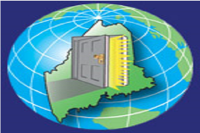

In [66]:
gis = GIS("Home")
Maine_Counties = gis.content.get('2e0f8882d809460d9a6f35aa86186750')
Maine_Counties

In [ ]:
# TO DO: Figure out how to append Cases/Deaths/Hospitalizations to Counties feature layer

In [ ]:
# TO DO: Figure out how to delete existing layer and publish updated layer each time